In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = ('/Users/cappsjr/Downloads/sentiment labelled sentences/amazon_cells_labelled.txt')

amazon_cells = pd.read_csv(data_path, delimiter = '\t', header = None)
amazon_cells.columns = ['Message', 'Sentiment']

In [3]:
amazon_cells.head()

,Message,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:
keywords = ['good', 'Good', 'great', 'Great', 'excellent', 'Excellent', 'satisfied', 'Satisfied',
            'impressed', 'Impressed', 'happy', 'Happy', 'love', 'Love', 
           'loved', 'Loved', 'like', 'Like', 'liked', 'Liked', 'nice', 'Nice', 'pleased', 'Pleased', 
           'amazing', 'Amazing', 'awesome', 'Awesome', 'excited', 'Excited', 'best', 'Best', 'Cool', 'cool',
           'fun', 'Fun', 'Rocks', 'rocks']

for key in keywords:
    amazon_cells[str(key)] = amazon_cells.Message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [5]:
amazon_cells['Sentiment'] = (amazon_cells['Sentiment'] == 1)

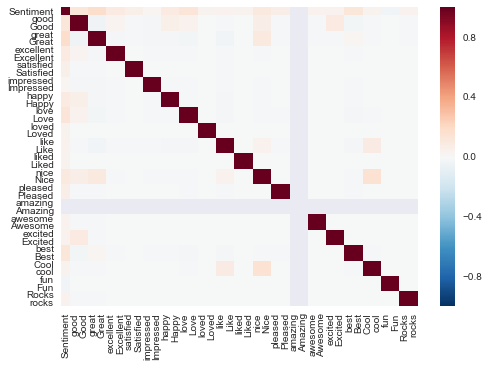

In [6]:
sns.heatmap(amazon_cells.corr())

In [7]:
data = amazon_cells[keywords]
target = amazon_cells['Sentiment']

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 370


In [8]:
amazon_cells.head()

,Message,Sentiment,good,Good,great,Great,excellent,Excellent,satisfied,Satisfied,...,excited,Excited,best,Best,Cool,cool,fun,Fun,Rocks,rocks
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
data_path1 = ('/Users/cappsjr/Downloads/sentiment labelled sentences/imdb_labelled.txt')

imdb = pd.read_csv(data_path1, delimiter = '\t', header = None)
imdb.columns = ['Message', 'Sentiment']

In [10]:
imdb.head()

,Message,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [11]:
keywords = ['good', 'Good', 'great', 'Great', 'excellent', 'Excellent', 'satisfied', 'Satisfied',
            'impressed', 'Impressed', 'happy', 'Happy', 'love', 'Love', 
           'loved', 'Loved', 'like', 'Like', 'liked', 'Liked', 'nice', 'Nice', 'pleased', 'Pleased', 
           'amazing', 'Amazing', 'awesome', 'Awesome', 'excited', 'Excited', 'best', 'Best', 'Cool', 'cool',
           'fun', 'Fun', 'Rocks', 'rocks']

for key in keywords:
    imdb[str(key)] = imdb.Message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [12]:
imdb['Sentiment'] = (imdb['Sentiment'] == 1)

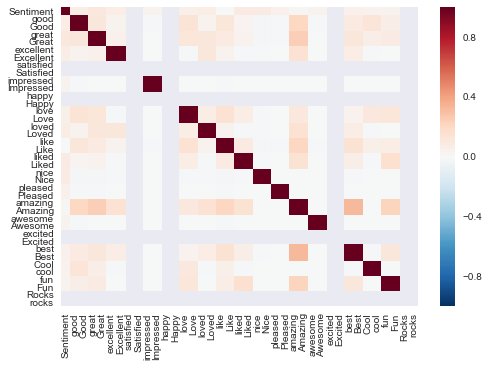

In [13]:
sns.heatmap(imdb.corr())

In [14]:
data = imdb[keywords]
target = imdb['Sentiment']

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 308
